In [1]:
import pandas as pd
from numpy import random
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import sys
import matplotlib
import math
from sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
df = pd.read_csv('./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=25)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,solver='liblinear')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
f1 = f1_score(y_test,y_pred,average='micro')
f1

0.7708333333333333

In [6]:
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings
warnings.filterwarnings("ignore")

np.random.seed = 31

lr = LogisticRegression()

parameters = {'C': [x / 10.0 for x in range(1, 100)], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
search = GridSearchCV(lr, parameters, scoring='f1_micro')
search.fit(x,y)
best_tree = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

0.7747984042101689
{'C': 5.5, 'penalty': 'l2', 'solver': 'lbfgs'}


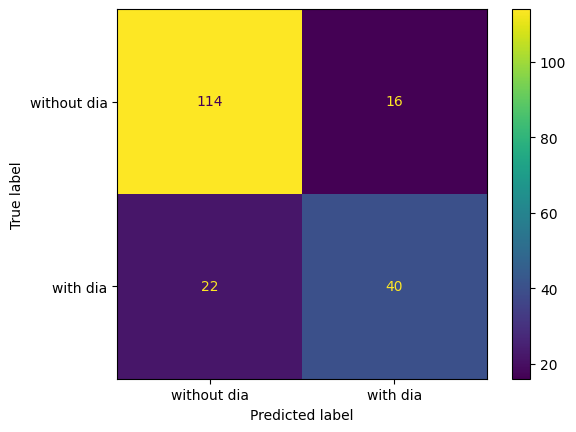

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_tree.predict(x_test)
target_name = ['without dia','with dia']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_name)
disp.plot()

In [8]:
from sklearn.metrics import classification_report

target_name = ['winhout dia','with dia']
print(classification_report(y_test,y_pred,target_names=target_name))

              precision    recall  f1-score   support

 winhout dia       0.84      0.88      0.86       130
    with dia       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



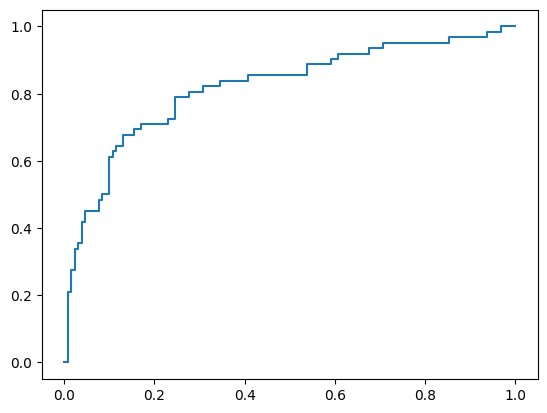

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label = str(auc))
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV
import numpy as np

np.random.seed = 31

clf = DecisionTreeClassifier(class_weight='balanced',random_state=31)

parameters = {'max_depth': range(1,10),'min_samples_split': range(2,40),'criterion':['gini','entropy','log_loss']}
search = GridSearchCV(clf,parameters, scoring='f1_micro')
search.fit(x,y)
best_tree2 = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

0.7305831423478482
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6}


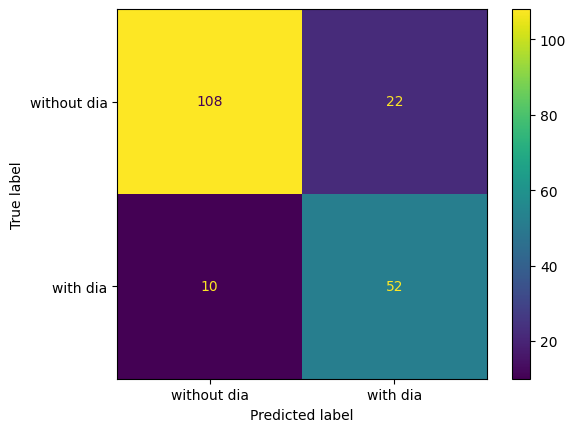

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_tree2.predict(x_test)
target_name = ['without dia','with dia']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_name)
disp.plot()

[Text(0.4817073170731707, 0.9166666666666666, 'Glucose <= 127.5\ngini = 0.5\nsamples = 768\nvalue = [384.0, 384.0]\nclass = with dia'),
 Text(0.22560975609756098, 0.75, 'Age <= 28.5\ngini = 0.428\nsamples = 485\nvalue = [300.288, 134.687]\nclass = without dia'),
 Text(0.12195121951219512, 0.5833333333333334, 'BMI <= 30.95\ngini = 0.251\nsamples = 271\nvalue = [190.464, 32.955]\nclass = without dia'),
 Text(0.07317073170731707, 0.4166666666666667, 'Pregnancies <= 7.5\ngini = 0.048\nsamples = 151\nvalue = [114.432, 2.866]\nclass = without dia'),
 Text(0.04878048780487805, 0.25, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.024\nsamples = 150\nvalue = [114.432, 1.433]\nclass = without dia'),
 Text(0.024390243902439025, 0.08333333333333333, 'gini = 0.0\nsamples = 131\nvalue = [100.608, 0.0]\nclass = without dia'),
 Text(0.07317073170731707, 0.08333333333333333, 'gini = 0.17\nsamples = 19\nvalue = [13.824, 1.433]\nclass = without dia'),
 Text(0.0975609756097561, 0.25, 'gini = -0.0\nsamples =

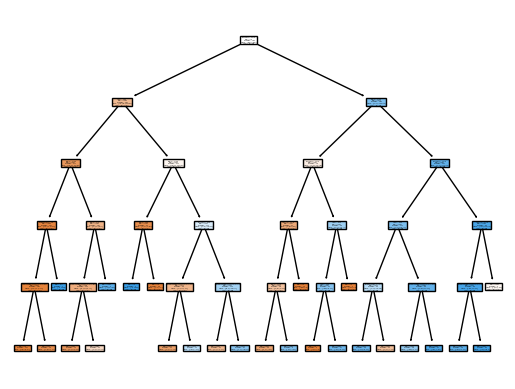

In [12]:
fn = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cn = ['without dia','with dia']
tree.plot_tree(best_tree2,feature_names=fn, class_names=cn,filled=True)